4окт23
# Начало matplotlib. Организация и визуализация данных.
* Как убрать строки с пустыми значениями?
* Как вывести хоть что-то?
* Какие бывают виды графиков?
* Ахахахаха, ящик с усами!
* Как сделать несколько графиков в одном выводе?

Сегодня тот самый день, когда мы наконец дошли до визуализации, которая позволит нам делать хоть какой-то анализ данных. Для этого нам понадобится библиотека matplotlib. Вот ее полная [документация](https://matplotlib.org/stable/users/index.html). Графики будем строить на примере такой таблицы.

In [1]:
import lib.l4 as l4

from random import gauss, sample, choice
from pandas import DataFrame, Index, Series
from numpy import nan, array

df = l4.create_df()
df.head(10)

,name,birth,height,weight,job,salary
ey05uck7,Shane House,1986-04-11,184.3,73.0,Software developer,NaN
WtUjsUZ7,Michael French,1980-08-23,178.4,70.7,Software developer,85055.0
oVywG9NP,David Montes,1979-08-29,162.6,65.4,AI architect,114245.0
cqX07H03,Amy Bell,2001-10-23,179.4,75.3,Full stack developer,90308.0
8GEbt4MZ,Laura Myers,1997-03-05,163.9,54.9,Data scientist,102172.0
9DhU46A1,Mark Irwin,2001-05-27,150.8,63.9,Data scientist,116935.0
aLBa7l8t,Curtis Burnett,1978-04-28,178.4,58.1,Full stack developer,109935.0
4D0rBiSi,Nancy Bennett,2021-09-25,154.2,61.3,Blockchain developer,147785.0
HLa7E7tU,Brett Bell,1978-08-03,177.7,86.6,Full stack developer,126822.0
JQYEVo7j,Kyle Ayala,2002-05-29,184.3,48.9,Full stack developer,96425.0


Данные готовы, но в некоторых строках есть пустые значения. Я хочу, чтобы ты запомнил оба варианта решения этой проблемы.

### df.replace()
Заменяет значения на что-либо.

In [2]:
df.replace(nan, 0).head(5)

,name,birth,height,weight,job,salary
ey05uck7,Shane House,1986-04-11,184.3,73.0,Software developer,0.0
WtUjsUZ7,Michael French,1980-08-23,178.4,70.7,Software developer,85055.0
oVywG9NP,David Montes,1979-08-29,162.6,65.4,AI architect,114245.0
cqX07H03,Amy Bell,2001-10-23,179.4,75.3,Full stack developer,90308.0
8GEbt4MZ,Laura Myers,1997-03-05,163.9,54.9,Data scientist,102172.0


### df.dropna()
Удаляет строки с пустыми значениями. Им я в итоге и воспользуюсь.

In [3]:
df = df.dropna()
df.head(5)

,name,birth,height,weight,job,salary
WtUjsUZ7,Michael French,1980-08-23,178.4,70.7,Software developer,85055.0
oVywG9NP,David Montes,1979-08-29,162.6,65.4,AI architect,114245.0
cqX07H03,Amy Bell,2001-10-23,179.4,75.3,Full stack developer,90308.0
8GEbt4MZ,Laura Myers,1997-03-05,163.9,54.9,Data scientist,102172.0
9DhU46A1,Mark Irwin,2001-05-27,150.8,63.9,Data scientist,116935.0


## Scatter
Документация по [ссылке](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

<IPython.core.display.Javascript object>


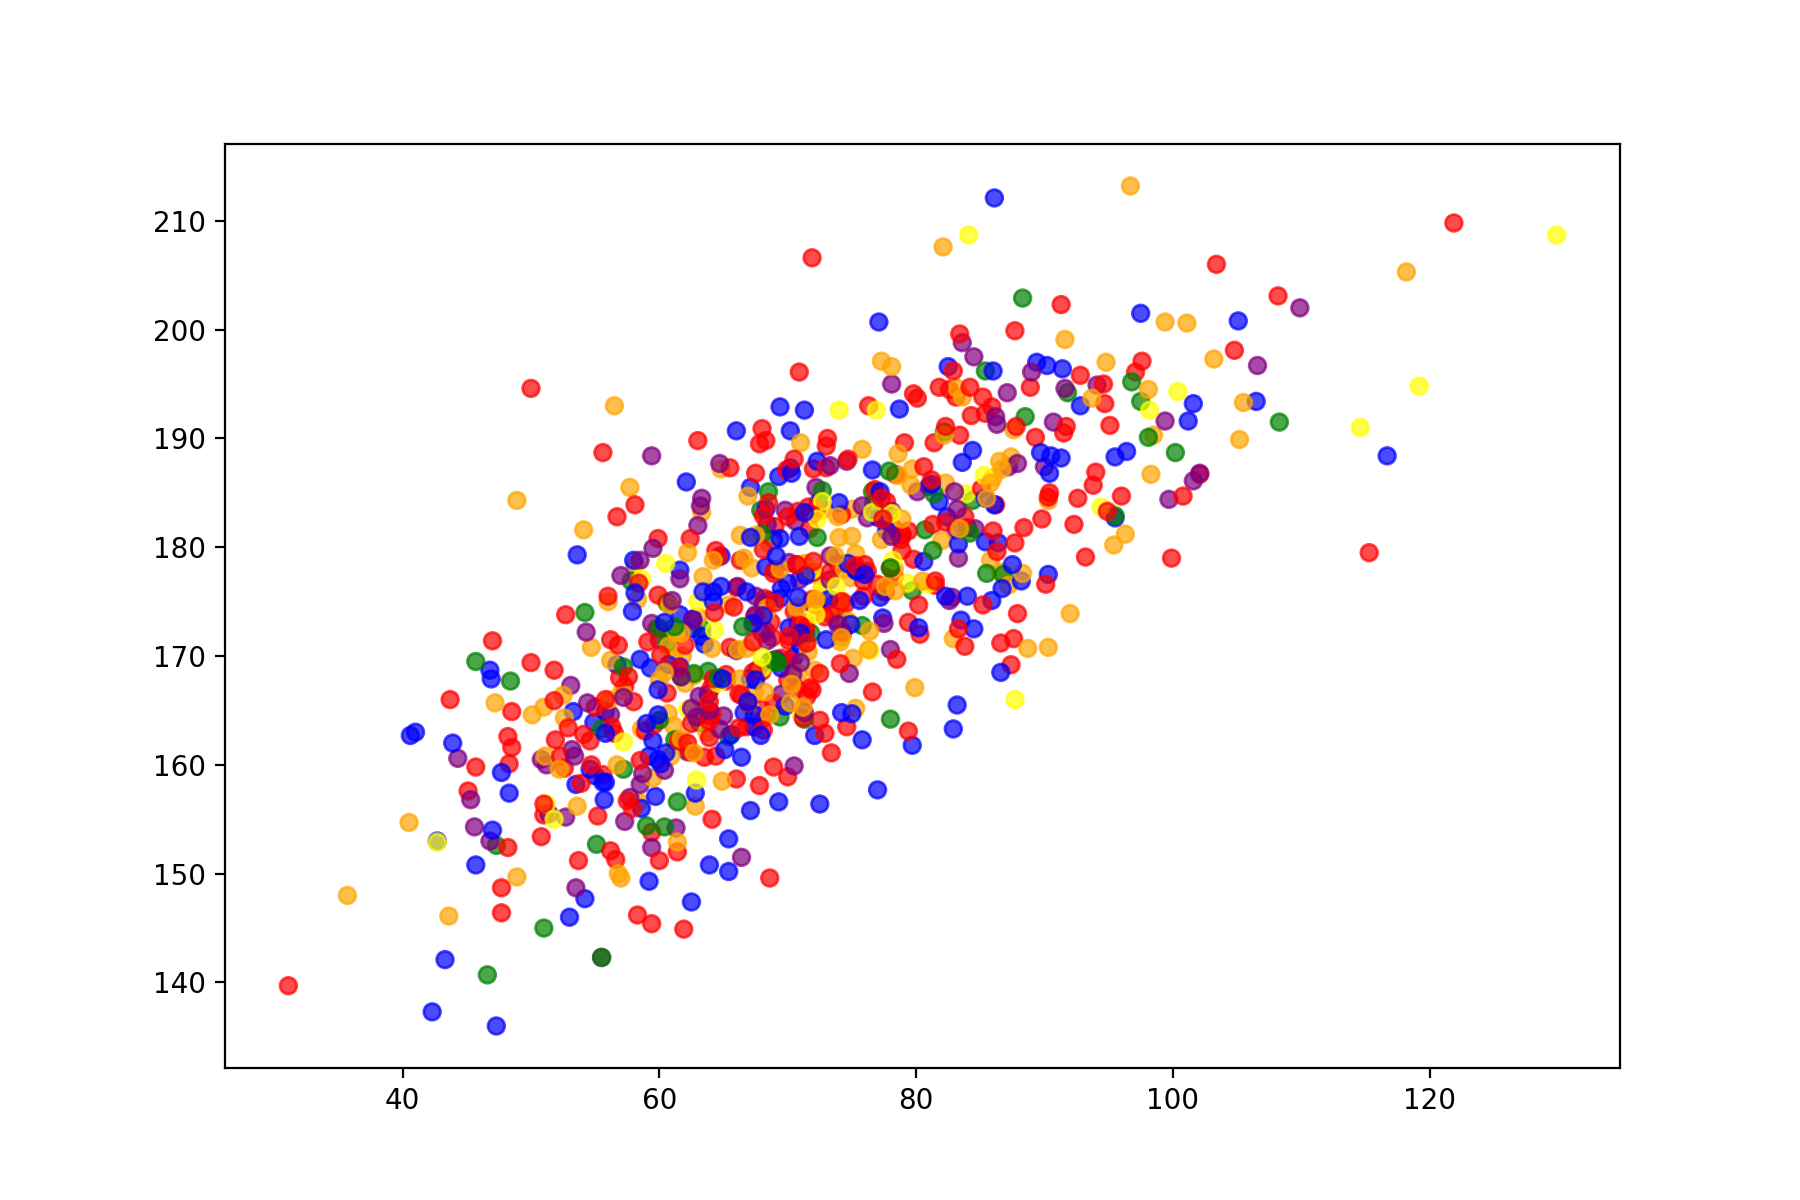

In [4]:
# импортирую библиотеку
from matplotlib import pyplot as plt

# эта строчка сделает графики более симпатичными и интерактивными
%matplotlib notebook

# создаю массив цветов
jobs_colors = Series({"Software developer" : "red", 
                      "Full stack developer" : "orange", 
                      "Project manager" : "yellow", 
                      "AI architect" : "green", 
                      "Data scientist" : "blue", 
                      "Blockchain developer" : "purple"})

# создание полотна и задание размеров
fig, ax = plt.subplots()
fig.set_figwidth(9)
fig.set_figheight(6)


# конкретно эта строчка создает график
ax.scatter(x=df["weight"], y=df["height"], c=jobs_colors[df["job"]], alpha=0.7)

# x и y это координаты данных по осям
# с – цвет
# alpha – степень прозрачности

# эта строчка выводит созданный график
plt.show()

По этому графику можно сказать, что более высокие люди – больше весят. При этом зависимости между профессией и ростом или профессией и весом – нет.

## Bar
Да, название забавное, но то ли еще будет. Документация по [ссылке](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py).

In [5]:
# сейчас буду пользоваться тем,
# что мы можем посчитать количество значений в столбце
jobs_counts = df["job"].value_counts().sort_index()
jobs_counts

job
AI architect             66
Blockchain developer    109
Data scientist          184
Full stack developer    159
Project manager          41
Software developer      271
Name: count, dtype: int64

<IPython.core.display.Javascript object>


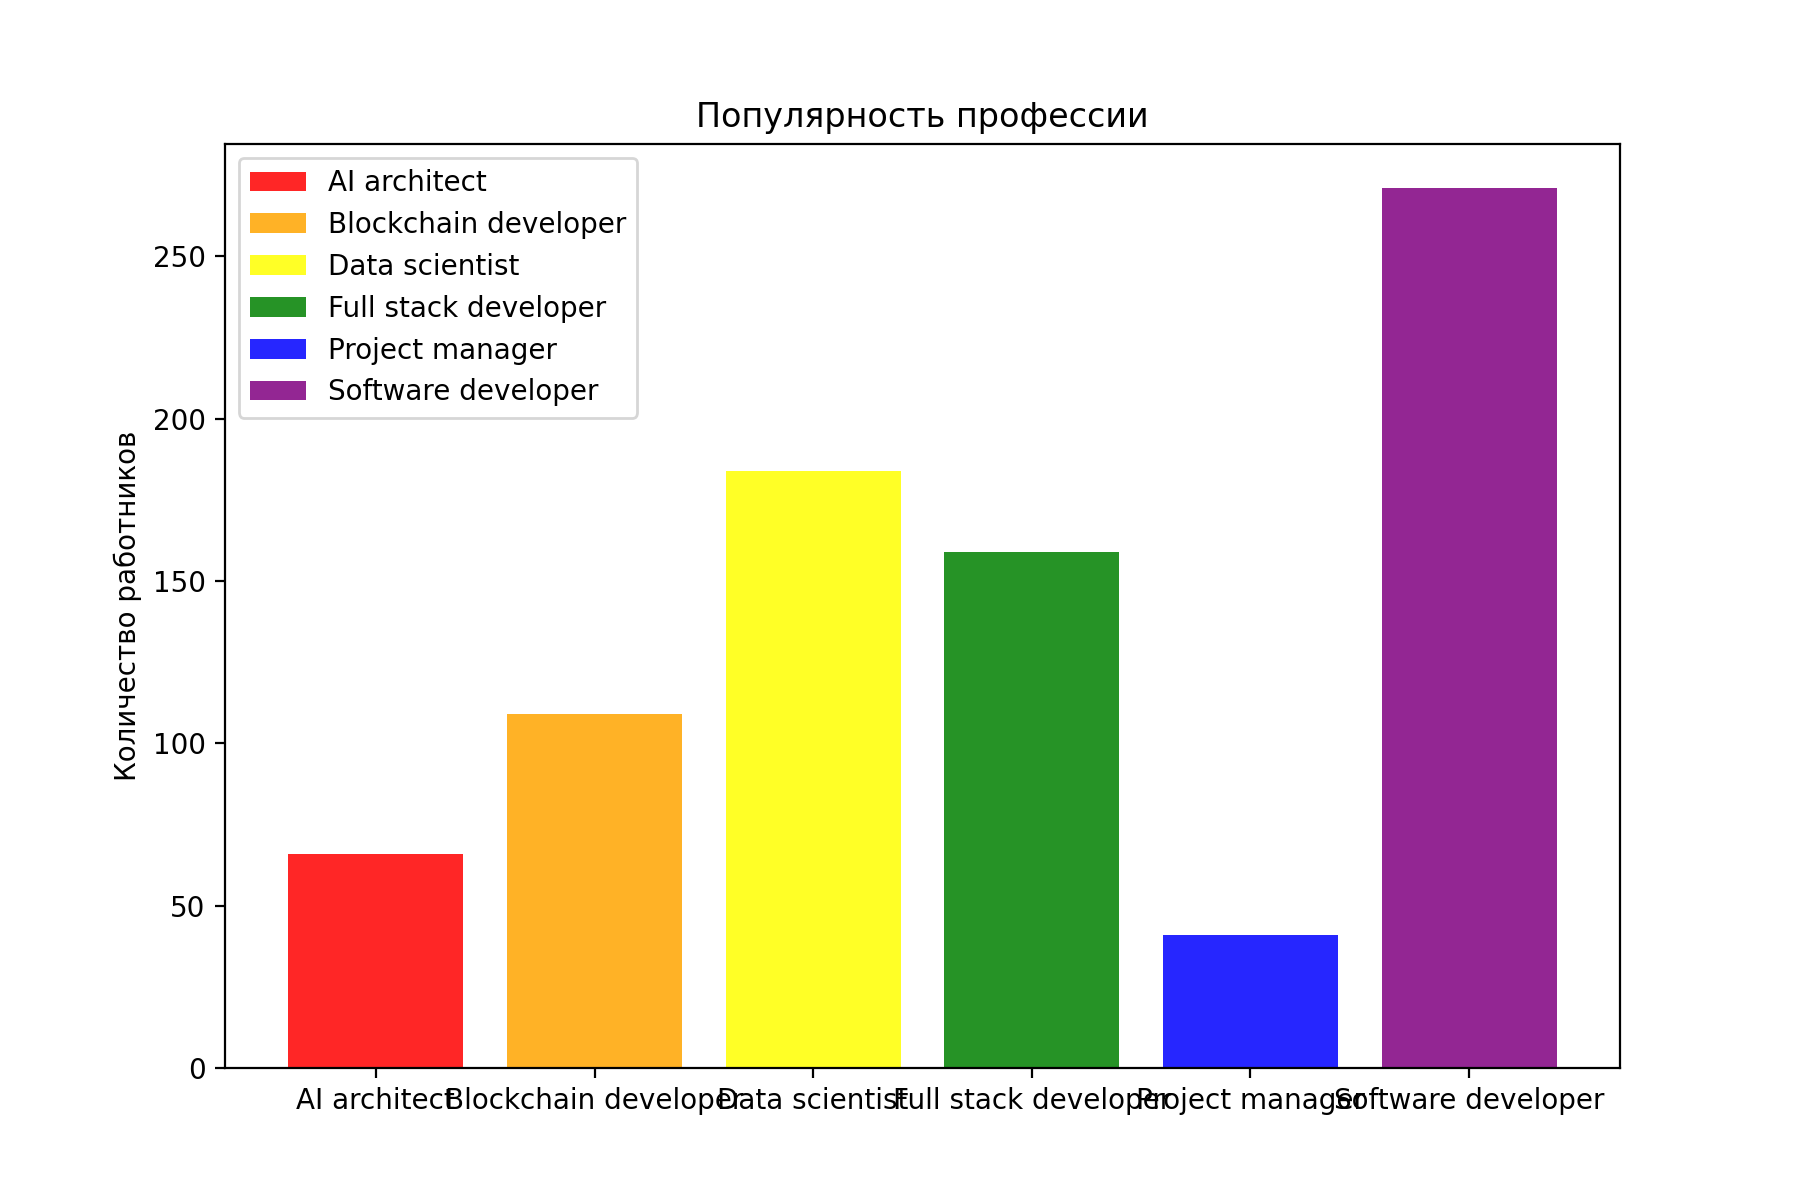

In [6]:
fig, ax = plt.subplots()
fig.set_figwidth(9)
fig.set_figheight(6)

bars = ax.bar(jobs_counts.index,
              jobs_counts.values,
              color=jobs_colors,
              alpha=0.85)

# так можно расставить надписи и легенду, дальше еще об этом напишу
# просто именно у барплота очень странно делается легенда, у остальных – по другому
ax.set_ylabel("Количество работников")
ax.set_title("Популярность профессии")
ax.legend(bars, jobs_counts.index, loc="upper left")

plt.show()

По этому графику очень заметна разница в количестве работников в разных профессиях. Больше всего разработчиков софта, меньше всего руководителей проектов.

## Box
Его альтернативное название "ящик с усами" мне нравится куда больше. Вот его [документация](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

Чтобы получить ящик с усами, сначала нужно подготовить данные. Я хочу, чтобы ящик с усами показывал зарплаты внутри каждой профессии, А значит нужно собрать двумерный массив, где в разных строках будут зарплаты разных профессий.

In [7]:
# сначала я пытался сделать так, нашел интересность
jobs_ser = Series([[]] * len(set(df["job"])))
jobs_ser.index = Index(set(df["job"]))

for i in df.head(10).index:
    jobs_ser[df.at[i, "job"]].append(df.at[i, "salary"])

jobs_ser

Full stack developer    [85055.0, 114245.0, 90308.0, 102172.0, 116935....
AI architect            [85055.0, 114245.0, 90308.0, 102172.0, 116935....
Blockchain developer    [85055.0, 114245.0, 90308.0, 102172.0, 116935....
Data scientist          [85055.0, 114245.0, 90308.0, 102172.0, 116935....
Project manager         [85055.0, 114245.0, 90308.0, 102172.0, 116935....
Software developer      [85055.0, 114245.0, 90308.0, 102172.0, 116935....
dtype: object

Это о себе говорит С++, на котором написан python, потому что при создании двумерного массива таком способом:
```python
[[]] * jobs.size
```
– мы получаем просто несколько ссылок на один и тот же массив, поэтому меняться они будут одновременно. При добавлении элемента в один из внутренних списков, мы добавим этот элемент во все вложенные списки.

In [8]:
# правильно будет вот так
jobs_ser = Series([[] for i in range(len(set(df["job"])))])
jobs_ser.index = Index(set(df["job"]))
jobs_ser = jobs_ser.sort_index()

for i in df.index:
    jobs_ser[df.at[i, "job"]].append(df.at[i, "salary"])

jobs_ser

AI architect            [114245.0, 119956.0, 155955.0, 103549.0, 13124...
Blockchain developer    [147785.0, 127535.0, 171096.0, 85287.0, 131950...
Data scientist          [102172.0, 116935.0, 114181.0, 90873.0, 116165...
Full stack developer    [90308.0, 109935.0, 126822.0, 96425.0, 109085....
Project manager         [128185.0, 67152.0, 106762.0, 116097.0, 83266....
Software developer      [85055.0, 79231.0, 93809.0, 83700.0, 93688.0, ...
dtype: object

Теперь можно строить ящик с усами!

<IPython.core.display.Javascript object>


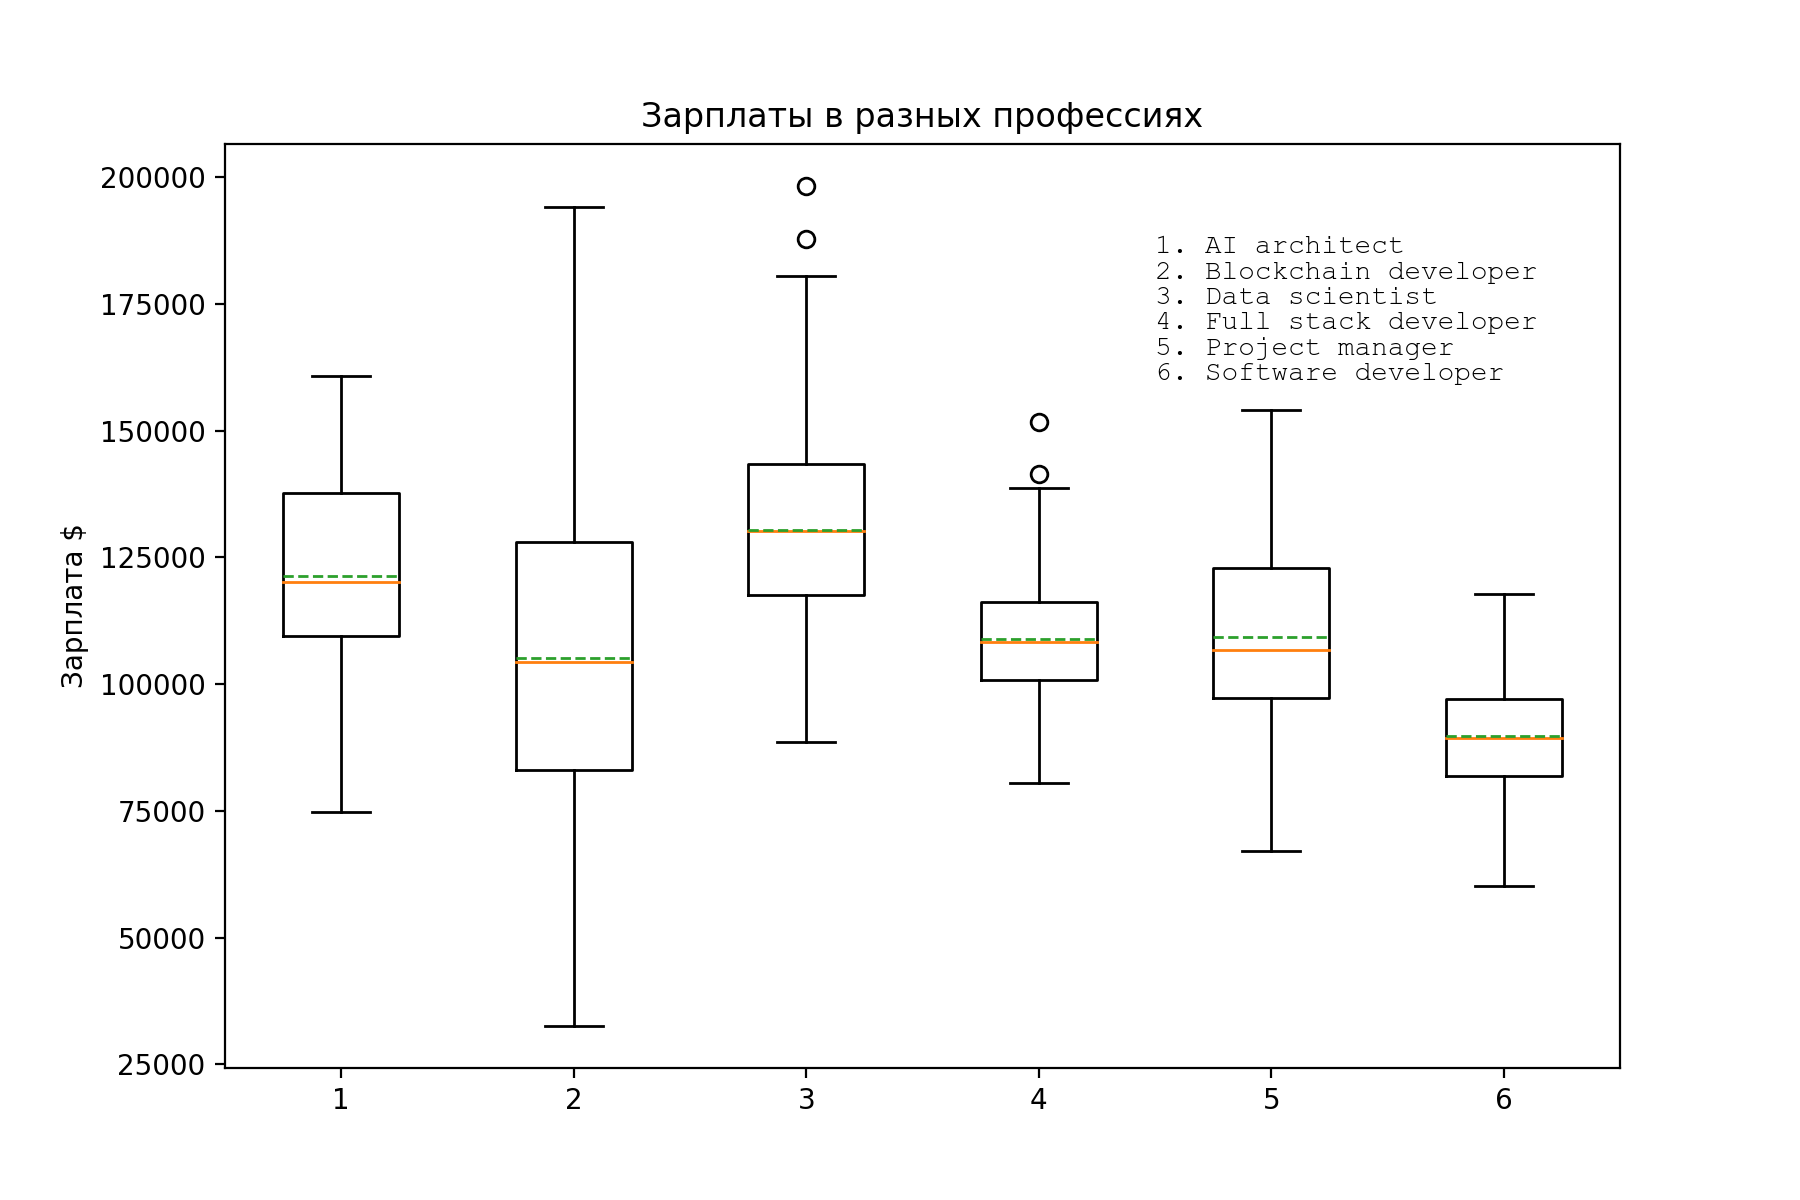

In [9]:
fig, ax = plt.subplots()
fig.set_figwidth(9)
fig.set_figheight(6)

ax.boxplot(jobs_ser.values, showmeans=True, meanline=True)

ax.set_ylabel("Зарплата $")
ax.set_title("Зарплаты в разных профессиях")

# так можно расположить текст на графике
for i in range(jobs_ser.size):
    plt.text(4.5, 185000 - 5000 * i, str(i + 1) + ". " + jobs_ser.index[i], family='Courier New')

plt.show()

Зеленая линия – медиана, оранжевая – среднее. По этому графику видно, что Data Scientist зарабатывает заметно больше остальных, но у него большой разброс. У Full Stack разработчика средняя зарплата больше 100k, а разброс маленький.

## Pie

График печеньки или график пирога, рисунок на котором большинство из нас учили дроби. Вот его [документация](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html). Все данные уже готовы, так что можно строить.

<IPython.core.display.Javascript object>


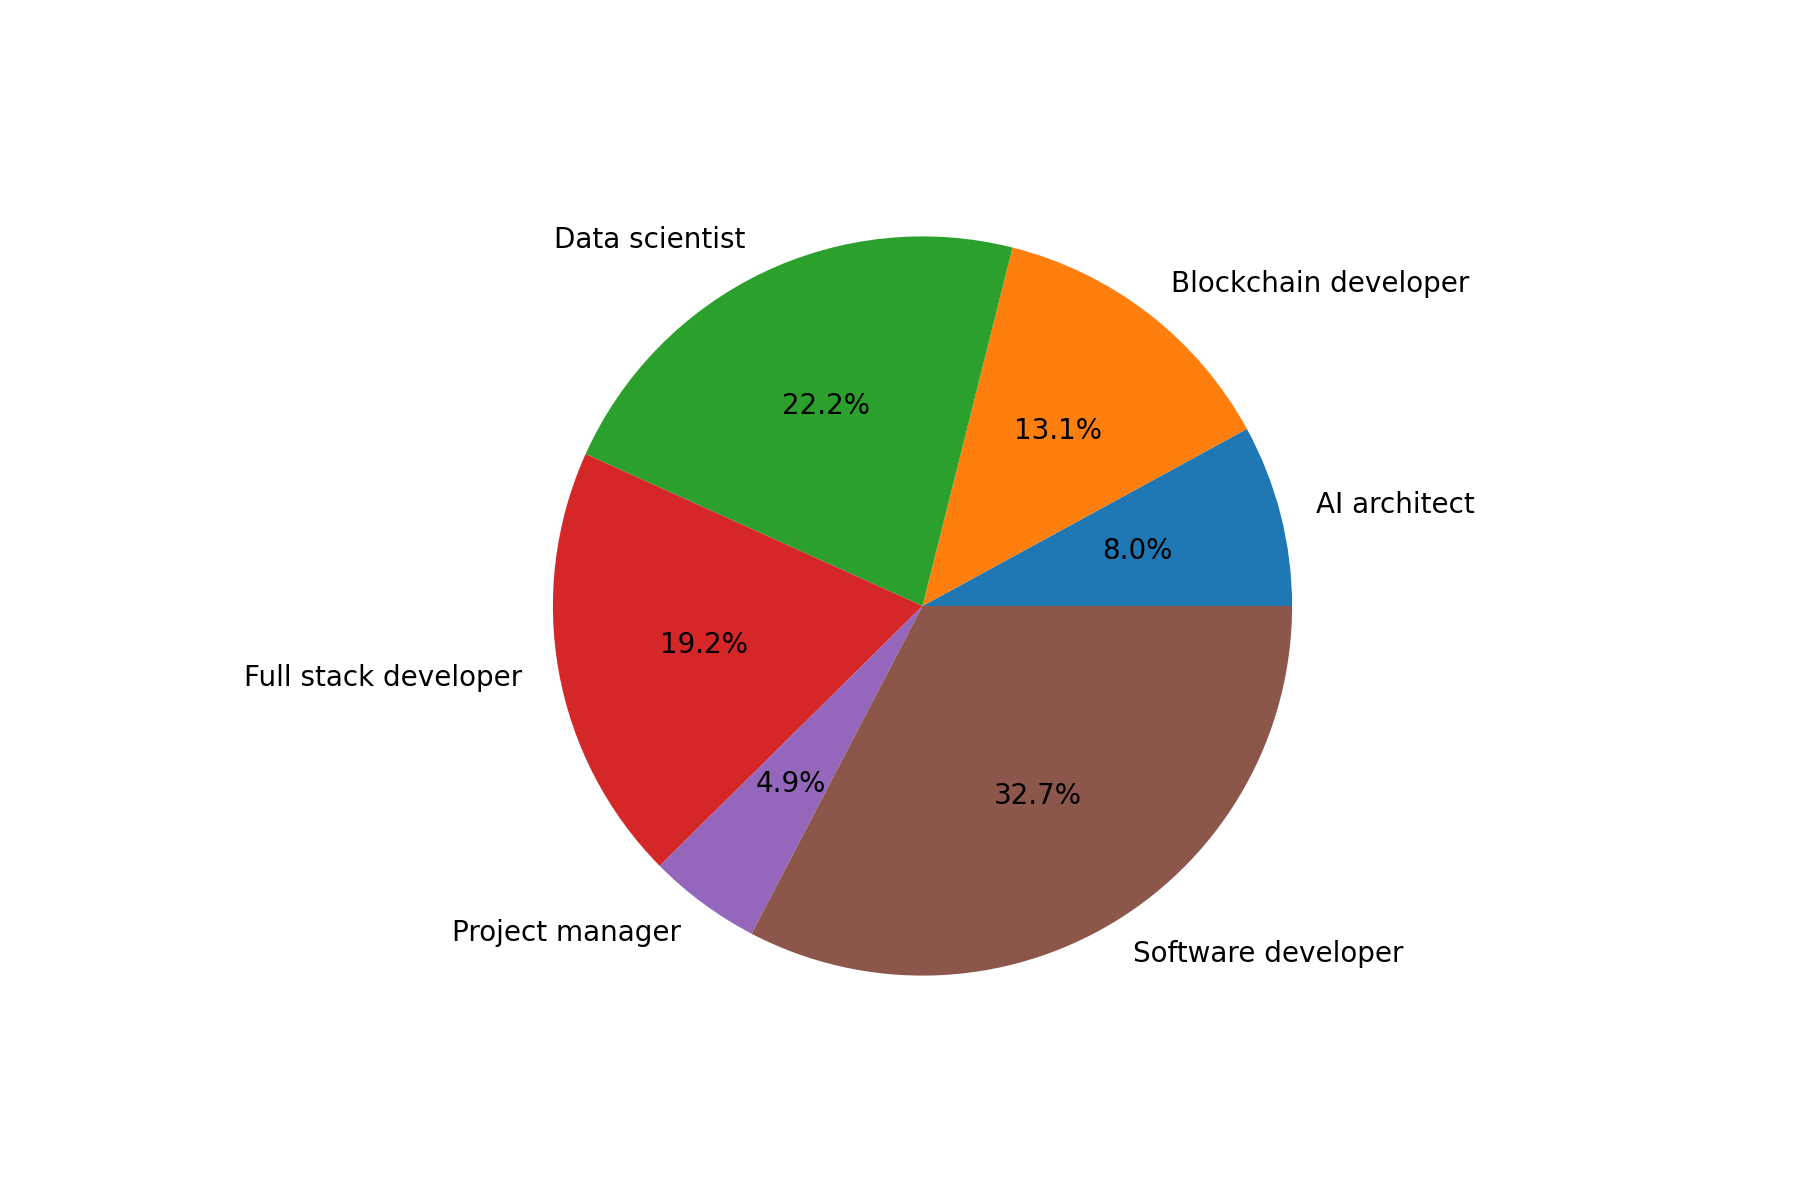

In [10]:
fig, ax = plt.subplots()
fig.set_figwidth(9)
fig.set_figheight(6)

# третий параметр указывает, что я хочу видеть подпись о конкретных процентных значениях
ax.pie(jobs_counts.values, labels=jobs_counts.index, autopct='%1.1f%%')
plt.show()

В этом случае этот график дает примерно ту же информацию, что и bar plot. Очень наглядная диаграмма – хорошо понятно, кого больше, кого меньше.

При подготовке в уроку я узнал, что в новую версию matplotlib добавили паттерны, которые можно добавлять на график. Вот [документация](https://matplotlib.org/stable/gallery/shapes_and_collections/hatch_style_reference.html) и пример графика. Как по мне, выглядит стильно.

<IPython.core.display.Javascript object>


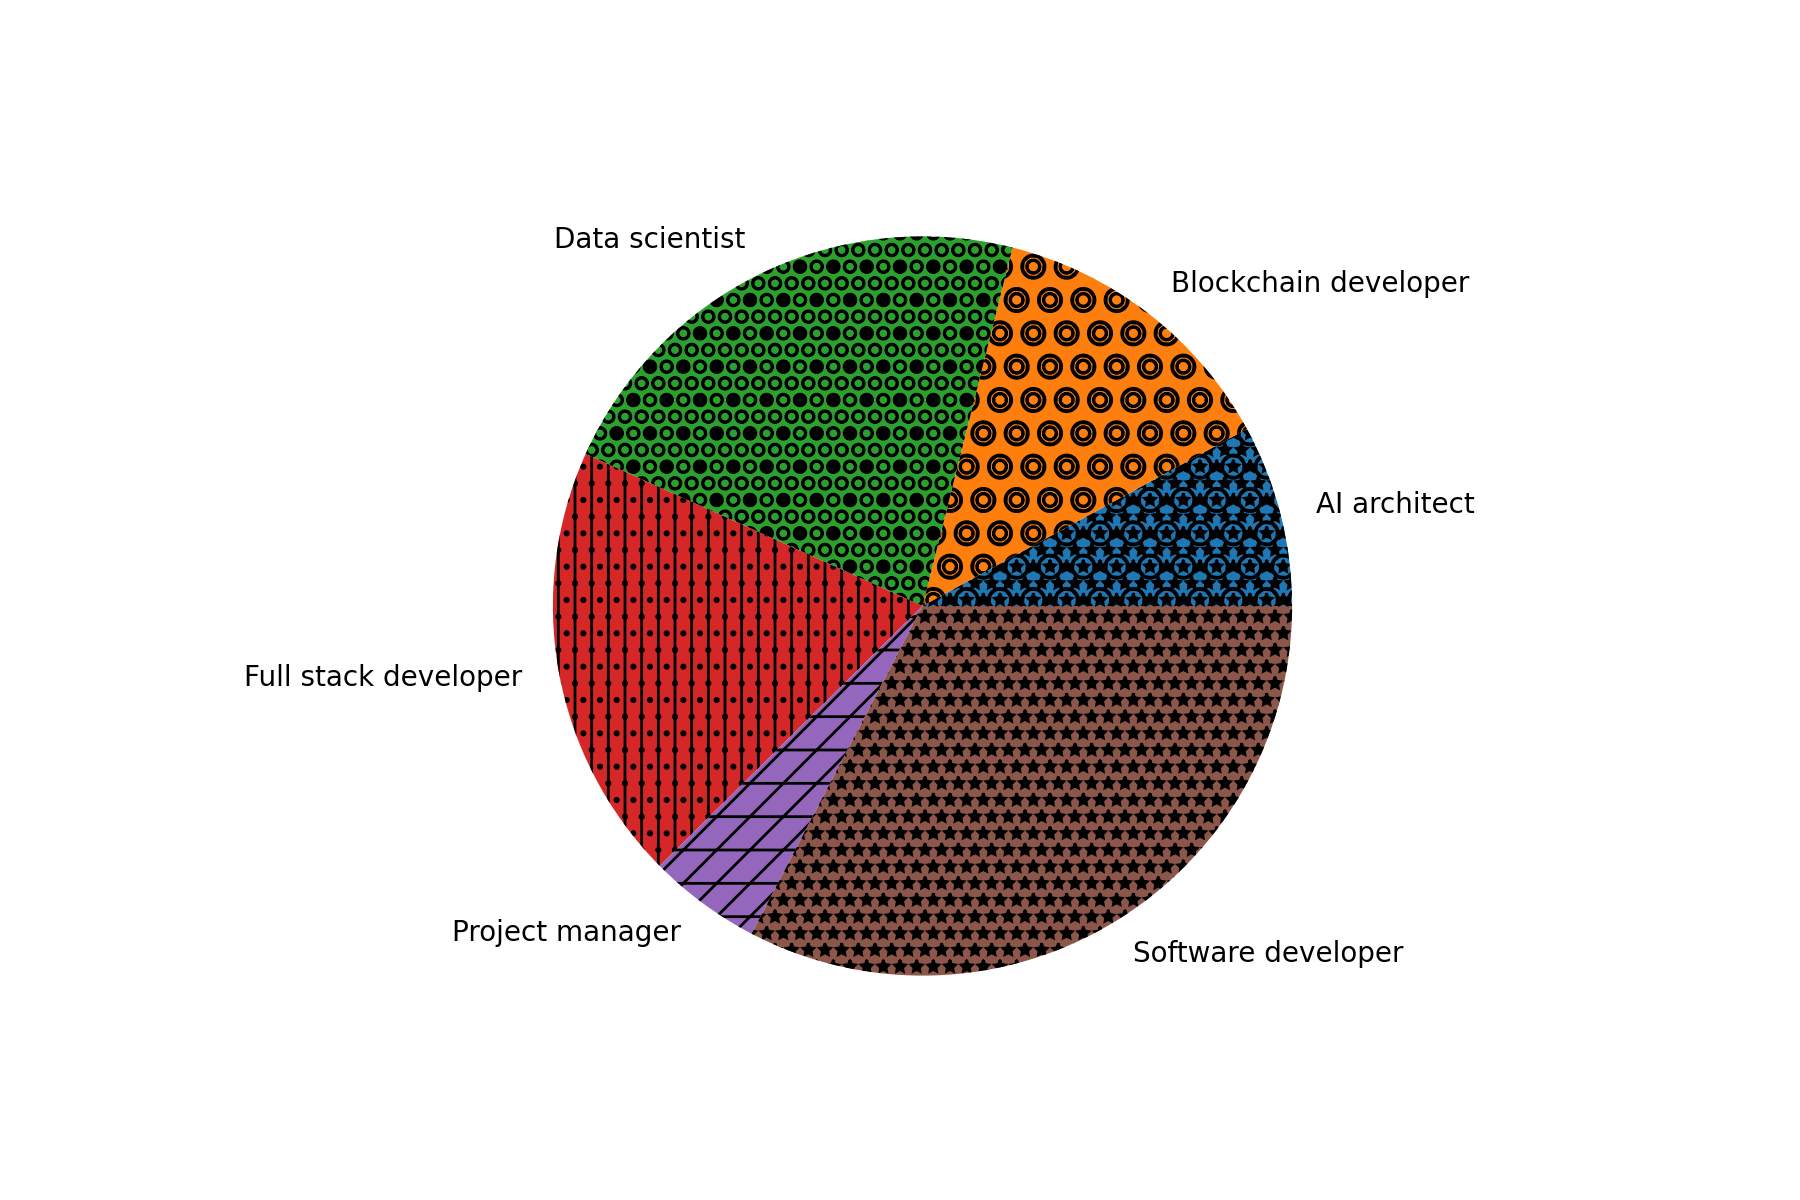

In [11]:
fig, ax = plt.subplots()
fig.set_figwidth(9)
fig.set_figheight(6)

# третий параметр как раз и создает эти паттерны
ax.pie(jobs_counts.values, labels=jobs_counts.index, hatch=['**O', 'oO', 'O.O', '.||.', '-//', '**'])
plt.show()

## Несколько графиков в одном выводе
Именно для этого все это время использовалась функция *subplots()*. Обращение к конкретному графику идет по индексам. Первый индекс – строки, второй – столбца.

<IPython.core.display.Javascript object>


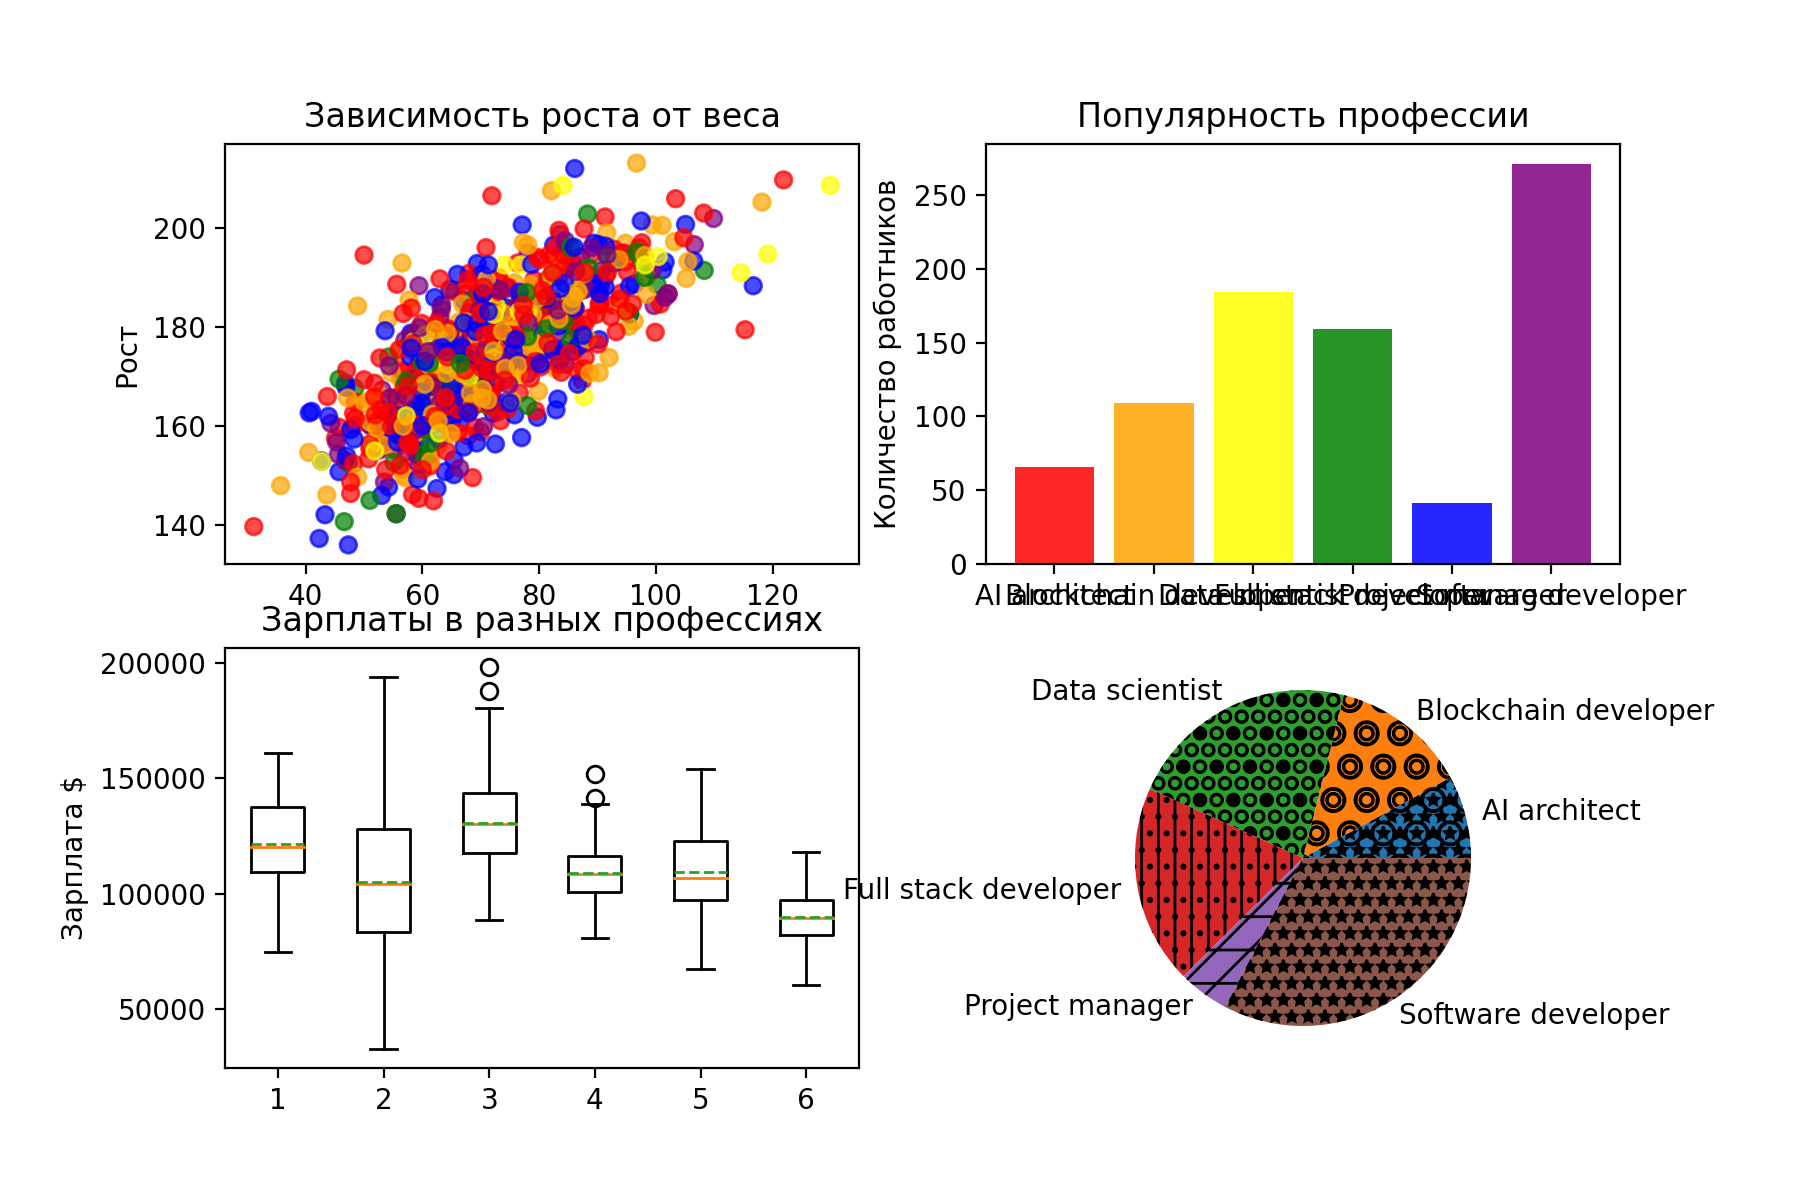

In [12]:
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(9)
fig.set_figheight(6)

axs[0, 0].scatter(x=df["weight"], y=df["height"], c=jobs_colors[df["job"]], alpha=0.7)
axs[0, 0].set_title("Зависимость роста от веса")
axs[0, 0].set_ylabel("Рост")

bars = axs[0, 1].bar(jobs_counts.index,
                    jobs_counts.values,
                    color=jobs_colors,
                    alpha=0.85)
axs[0, 1].set_ylabel("Количество работников")
axs[0, 1].set_title("Популярность профессии")

axs[1, 0].boxplot(jobs_ser.values, showmeans=True, meanline=True)
axs[1, 0].set_ylabel("Зарплата $")
axs[1, 0].set_title("Зарплаты в разных профессиях")

axs[1, 1].pie(jobs_counts.values, labels=jobs_counts.index, hatch=['**O', 'oO', 'O.O', '.||.', '-//', '**'])


plt.show()

---
## Задачи для самостоятельного выполнения
Дедлайн 10окт23 23:59.

|Вариант 1|Вариант 2|
|:-----------:|:----------:|
|CSV файл по [ссылке](https://raw.githubusercontent.com/toUpperCase78/formula1-datasets/master/Formula1_2023season_raceResults.csv)|CSV файл по [ссылке](https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv)|
|1. Выбрать один трек (любой) и построить bar plot лучших кругов для каждого гонщика|1. Построить bar plot по количеству выживших в каждом классе|
|2. Построить два графика pie plot (в одном выводе). На одном показать, сколько раз Max Verstappen приходил 1-ым, 2-ым и тд, на втором ту же информацию о Lewis Hamilton|2. Построить два pie plot (в одном выводе) о количестве выживших и не выживших среди мужчин (на одном графике) и женщин (на другом)|
